# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.2.2 requires scikit-plot, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
from sklearn.decomposition import PCA
def PCA_image(image): 
    bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces_pca = PCA(n_components=0.98)
    faces_pca.fit(bw)
    components = faces_pca.transform(bw)
    projected = faces_pca.inverse_transform(components)
    projected = projected.astype(np.uint8)
    projected = cv2.cvtColor(projected, cv2.COLOR_GRAY2RGB)
    return projected

In [4]:
def mediapipe_detection(image, model):
    #image = PCA_image(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
count = 0 
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        cv2.imwrite("frame%d.jpg" % count, frame)
        count += 1
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

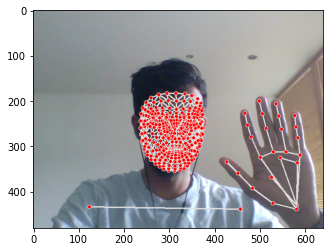

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:
len(results.face_landmarks.landmark)

468

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.48873949,  0.56652272, -1.08507097, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
468*3+33*4+21*3+21*3

1662

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.48873949,  0.56652272, -1.08507097, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [98]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
# Actions that we try to detect
#actions=np.array(['after','again','also','ask', 'beautiful', 'because', 'before', 'better','big', 'bring','busy', 'but', 'buy', 'change', 'close', 'color', 'day', 'drink','easy','enough', 'fast', 'few', 'fine', 'finish', 'gone', 'goodbye', 'happy','hard','hello','help','here','how','hurt','iloveyou','improve','in','keep','know','last','later','learn','live','man','many','me','meet','more','name', 'near', 'need', 'never', 'new', 'next', 'night', 'no', 'now', 'open', 'other', 'out', 'play', 'please', 'say', 'sorry', 'thankyou', 'think','time', 'welcome', 'what', 'when', 'where', 'which', 'who', 'why', 'will', 'with','work','write','yes', 'you', 'your'])
actions = np.array(['please', 'say', 'sorry', 'thankyou', 'think','time', 'welcome', 'what', 'when', 'where', 'which', 'who', 'why', 'will', 'with','work','write','yes', 'you', 'your'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 30

In [99]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.8) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            count = 0
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                path=os.path.join(DATA_PATH, action, str(sequence))
                cv2.imwrite(os.path.join(path , "frame%d.jpg" % count), frame)
                count = count +1
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [100]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [101]:
label_map = {label:num for num, label in enumerate(actions)}

In [102]:
actions.shape[0]

20

In [103]:
label_map

{'please': 0,
 'say': 1,
 'sorry': 2,
 'thankyou': 3,
 'think': 4,
 'time': 5,
 'welcome': 6,
 'what': 7,
 'when': 8,
 'where': 9,
 'which': 10,
 'who': 11,
 'why': 12,
 'will': 13,
 'with': 14,
 'work': 15,
 'write': 16,
 'yes': 17,
 'you': 18,
 'your': 19}

In [104]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [105]:
np.array(sequences).shape

(300, 30, 1662)

In [106]:
np.array(labels).shape

(300,)

In [107]:
X = np.array(sequences)

In [108]:
X.shape

(300, 30, 1662)

In [109]:
y = to_categorical(labels).astype(int)

In [110]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [112]:
y_test.shape

(15, 20)

# 7. Build and Train LSTM Neural Network

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [114]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [131]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [132]:
res = [.7, 0.2, 0.1]

In [133]:
actions[np.argmax(res)]

'please'

In [134]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [135]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
9/9 [==============================] - 6s 455ms/step - loss: 3.3341 - categorical_accuracy: 0.0632
Epoch 2/200
9/9 [==============================] - 1s 62ms/step - loss: 2.9960 - categorical_accuracy: 0.0526
Epoch 3/200
9/9 [==============================] - 1s 60ms/step - loss: 3.0052 - categorical_accuracy: 0.0316
Epoch 4/200
9/9 [==============================] - 1s 63ms/step - loss: 2.9435 - categorical_accuracy: 0.0421
Epoch 5/200
9/9 [==============================] - 1s 60ms/step - loss: 2.8199 - categorical_accuracy: 0.0737
Epoch 6/200
9/9 [==============================] - 1s 62ms/step - loss: 2.7661 - categorical_accuracy: 0.1158
Epoch 7/200
9/9 [==============================] - 1s 62ms/step - loss: 2.7440 - categorical_accuracy: 0.0807
Epoch 8/200
9/9 [==============================] - 1s 60ms/step - loss: 2.5945 - categorical_accuracy: 0.1123
Epoch 9/200
9/9 [==============================] - 1s 62ms/step - loss: 2.4809 - categorical_accuracy: 0.1298
Epoch 10/

9/9 [==============================] - 1s 67ms/step - loss: 0.8527 - categorical_accuracy: 0.7298
Epoch 75/200
9/9 [==============================] - 1s 68ms/step - loss: 0.6808 - categorical_accuracy: 0.7614
Epoch 76/200
9/9 [==============================] - 1s 63ms/step - loss: 0.8908 - categorical_accuracy: 0.7579
Epoch 77/200
9/9 [==============================] - 1s 66ms/step - loss: 0.9691 - categorical_accuracy: 0.6877
Epoch 78/200
9/9 [==============================] - 1s 68ms/step - loss: 0.8657 - categorical_accuracy: 0.7263
Epoch 79/200
9/9 [==============================] - 1s 65ms/step - loss: 7.9477 - categorical_accuracy: 0.4281
Epoch 80/200
9/9 [==============================] - 1s 70ms/step - loss: 3.2144 - categorical_accuracy: 0.1158
Epoch 81/200
9/9 [==============================] - 1s 70ms/step - loss: 2.5898 - categorical_accuracy: 0.2035
Epoch 82/200
9/9 [==============================] - 1s 67ms/step - loss: 2.4787 - categorical_accuracy: 0.1719
Epoch 83/200
9

9/9 [==============================] - 1s 64ms/step - loss: 0.5905 - categorical_accuracy: 0.7789
Epoch 148/200
9/9 [==============================] - 1s 61ms/step - loss: 0.7466 - categorical_accuracy: 0.7649
Epoch 149/200
9/9 [==============================] - 1s 63ms/step - loss: 0.5311 - categorical_accuracy: 0.7895
Epoch 150/200
9/9 [==============================] - 1s 62ms/step - loss: 0.3659 - categorical_accuracy: 0.8842
Epoch 151/200
9/9 [==============================] - 1s 67ms/step - loss: 0.3029 - categorical_accuracy: 0.9053
Epoch 152/200
9/9 [==============================] - 1s 70ms/step - loss: 0.3276 - categorical_accuracy: 0.9018
Epoch 153/200
9/9 [==============================] - 1s 69ms/step - loss: 0.3085 - categorical_accuracy: 0.8947
Epoch 154/200
9/9 [==============================] - 1s 65ms/step - loss: 0.2460 - categorical_accuracy: 0.9193
Epoch 155/200
9/9 [==============================] - 1s 68ms/step - loss: 0.2479 - categorical_accuracy: 0.9018
Epoch 

In [136]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                660       
Total params: 683,508
Trainable params: 683,508
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [214]:
res = model.predict(X_test)

In [215]:
actions[np.argmax(res[1])]

'your'

In [216]:
actions[np.argmax(y_test[2])]

'which'

# 9. Save Weights

In [222]:
model.save('LSTM_4.h5')

In [ ]:
del model

In [42]:
model.load_weights('LSTM_4.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [137]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [138]:
yhat = model.predict(X_test)

In [139]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [140]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[13,  1],
        [ 0,  1]],

       [[12,  1],
        [ 1,  1]],

       [[14,  1],
        [ 0,  0]],

       [[13,  1],
        [ 1,  0]],

       [[14,  0],
        [ 0,  1]],

       [[12,  0],
        [ 0,  3]],

       [[13,  0],
        [ 2,  0]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]]], dtype=int64)

In [141]:
accuracy_score(ytrue, yhat)

0.7333333333333333

# 11. Test in Real Time

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        print(actions)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [65]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (117, 245, 16), (16, 117, 245)]
[(245, 117, 16), (11

IndexError: index 20 is out of bounds for axis 0 with size 20

<Figure size 1296x1296 with 0 Axes>

In [229]:
sequences.reverse()

In [230]:
len(sequences)

300

In [232]:
sequences.append('def')

In [233]:
sequences.reverse()

In [234]:
sequences[-30:]

[[array([ 0.51146245,  0.57251835, -1.13423097, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51546526,  0.54278153, -1.22754455, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51835686,  0.53043461, -1.27232718, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51839167,  0.52421391, -1.28859699, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51835364,  0.52361697, -1.24324596, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51832128,  0.52312297, -1.21038747, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51675379,  0.51726192, -1.27721   , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50759822,  0.51252311, -1.25746059, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50100935,  0.50984043, -1.26228833, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49508649,  0.50674403, -1.27160668, ...,  0.        ,
       

In [235]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: index 44999 is out of bounds for axis 0 with size 20

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))